Import the libraries

In [1]:
import pandas as pd
# Pandas is an open-source data manipulation and analysis library for the Python

import matplotlib.pyplot as plt
# The "Matplotlib" library is a popular and widely-used Python library for creating data visualizations, particularly 2D and simple 3D plots

import numpy as np
#NumPy, short for "Numerical Python," is a powerful Python library for numerical and scientific computing. It provides support for working with large, multi-dimensional arrays and matrices of numerical data, as well as a wide range of mathematical functions to operate on these arrays. 

Getting seaborn online to give our graphics a kick.

In [2]:
import seaborn as sns
sns.set()

Importing the dataset

In [3]:
df_dataS = pd.read_csv('tested.csv',sep=',', index_col=0)

Checking for the variables in the titanic dataset

In [4]:
df_dataS.keys()

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df_dataS.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Checking the shape of the titanic dataset(i.e the number of rows and columns)

In [6]:
df_dataS.shape

(418, 11)

Description

In [7]:
df_dataS.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


Information

In [8]:
df_dataS.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Name      418 non-null    object 
 3   Sex       418 non-null    object 
 4   Age       332 non-null    float64
 5   SibSp     418 non-null    int64  
 6   Parch     418 non-null    int64  
 7   Ticket    418 non-null    object 
 8   Fare      417 non-null    float64
 9   Cabin     91 non-null     object 
 10  Embarked  418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 39.2+ KB


This shows all the unique entries in the dataset for the survived column.

In [10]:
df_dataS['Survived'].unique()

array([0, 1], dtype=int64)

This checks for the number survivors
 

In [11]:
df_dataS['Survived'].value_counts()

Survived
0    266
1    152
Name: count, dtype: int64

Missing data


In [13]:
df_dataS.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

Visualizing the missing data using an histogram chat

<Axes: >

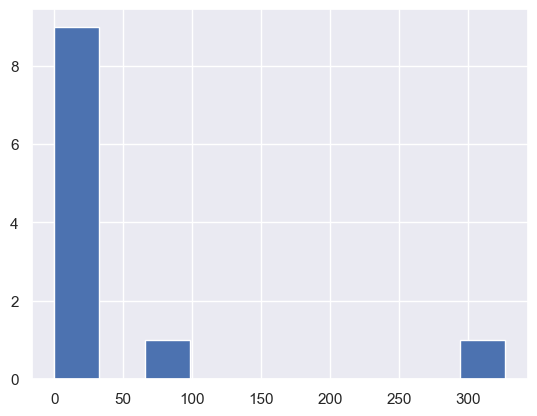

In [14]:
df_dataS.isna().sum().hist()

Using a heatmap to visualize the missing data so as to get a better view

<Axes: ylabel='PassengerId'>

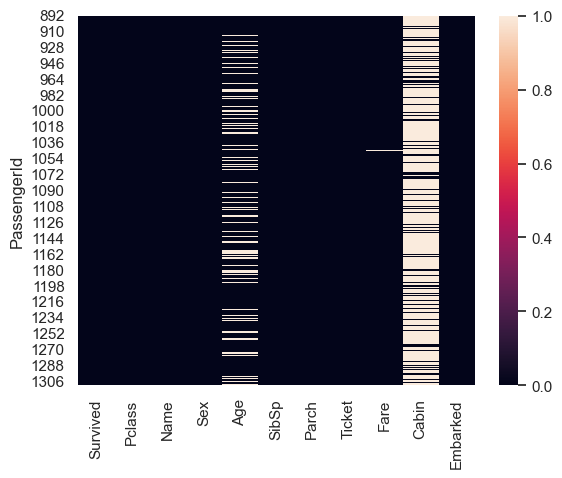

In [15]:
sns.heatmap(df_dataS.isna())

As seen above the age has 86 missing data, fare has a missing data and the cabin has 327 missing.
Using the mean to sort the fare and age and dropping the cabin data as it has to many missing values


In [12]:
#Age
df_dataS['Age'].replace(np.nan, df_dataS['Age'].mean(), inplace=True)

#Fare
df_dataS['Fare'].replace(np.nan, df_dataS['Fare'].mean(), inplace=True)

In [13]:
#cabin
df_dataS.drop('Cabin', axis=1,inplace=True)

In [14]:
#CHECKING THE RESULTS
df_dataS.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

Above - Missing data sorted

Checking for nnumerical and class data

In [15]:
df_dataS.nunique()

Survived      2
Pclass        3
Name        418
Sex           2
Age          80
SibSp         7
Parch         8
Ticket      363
Fare        170
Embarked      3
dtype: int64

seperating the variables into category and numerical classes

In [20]:
c_variables = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
n_variables = ['Age', 'Fare',]


In [21]:
df_dataS.keys()

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

The graph bellow shows the relation between fares and class of the passenger and also that the passengers with high fares  had more chance of survival

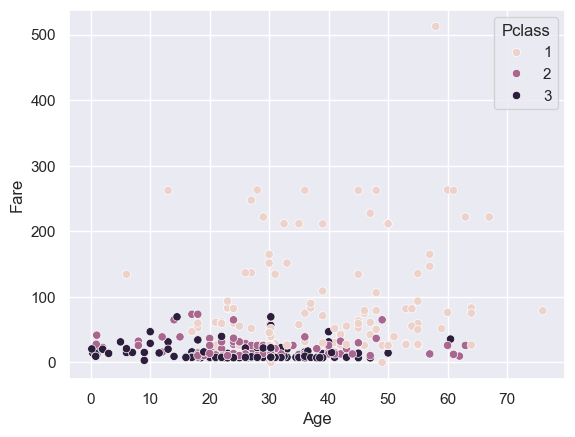

In [22]:
sns.scatterplot(data=df_dataS, x='Age', y='Fare', hue= 'Pclass')
plt.show()

Graph bellow shows the age distribution of survivors

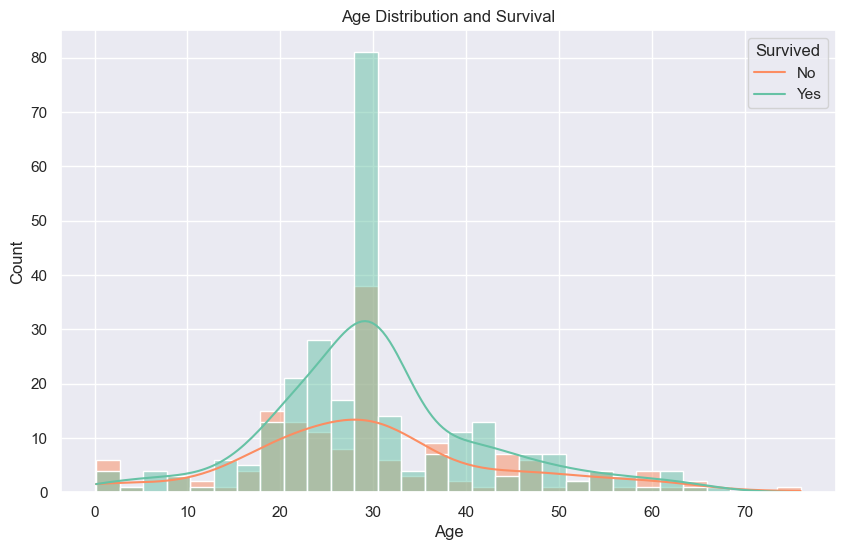

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_dataS, x='Age', hue='Survived', bins=30, kde=True, palette="Set2")
plt.title("Age Distribution and Survival")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

Graph bellow shows survival based on embarked port

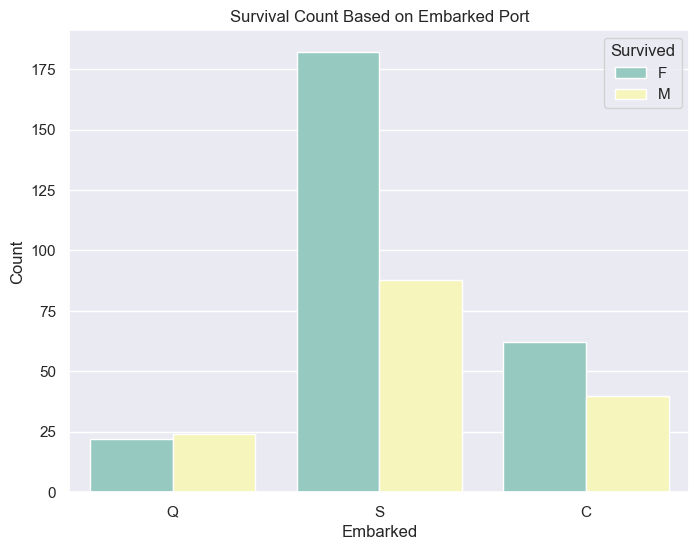

In [24]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_dataS, x='Embarked', hue='Survived', palette="Set3")
plt.title("Survival Count Based on Embarked Port")
plt.xlabel("Embarked")
plt.ylabel("Count")
plt.legend(title='Survived', labels=['F', 'M'])
plt.show()

# Prediction

Handling the non numerical values by encoding them so the computer can make sense of it

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
le = LabelEncoder()

In [58]:
df_dataS.keys()

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

In [19]:
for x in df_dataS.keys():
    if x == 'Survived':
        print("SKIIIIIP")
    elif x == 'Pclass':
         print("SKIIIIIP")
    elif x == 'Age':
         print("SKIIIIIP")
    elif x == 'SibSp':
         print("SKIIIIIP")    
    elif x == 'Parch':
          print("SKIIIIIP")
    elif x == 'Fare'   :
          print("SKIIIIIP")   
    else:
        df_dataS[f'{x}_enc'] = le.fit_transform(df_dataS[x])

SKIIIIIP
SKIIIIIP
SKIIIIIP
SKIIIIIP
SKIIIIIP
SKIIIIIP


In [20]:
df_dataS.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Name_enc,Sex_enc,Ticket_enc,Embarked_enc
PassengerId,,,,,,,,,,,,,,
892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,206,1,152,1
893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,403,0,221,2
894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,269,1,73,1
895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,408,1,147,2
896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,178,0,138,2


In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


In [22]:
from sklearn.model_selection import train_test_split


In [23]:
# Separating the train and test.
train, test = train_test_split(df_dataS, random_state=42) 

In [ ]:
train.head()

In [ ]:
test.head()

In [25]:
df_dataS.keys()

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked', 'Name_enc', 'Sex_enc', 'Ticket_enc',
       'Embarked_enc'],
      dtype='object')

Train the device to predict the age

In [26]:
X_train = train[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch',
       'Fare', 'Name_enc', 'Sex_enc', 'Ticket_enc',
       'Embarked_enc']]
X_test = test[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch',
       'Fare', 'Name_enc', 'Sex_enc', 'Ticket_enc',
       'Embarked_enc']]
y_train = train['Age']
y_test = test['Age']

Using the decision tree regressor to predict the age of survivors 

In [28]:
from sklearn.tree import DecisionTreeRegressor

In [29]:
DTR = DecisionTreeRegressor(max_depth=900,random_state=42)

DTR.fit(X_train,y_train)

y_pred = DTR.predict(X_test)

(-2.6715, 61.908500000000004)

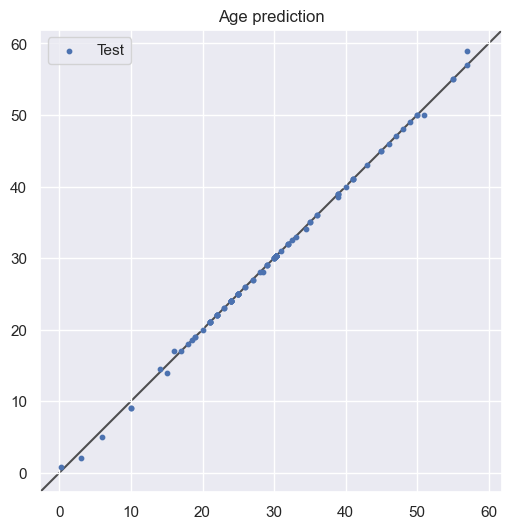

In [30]:
fig, ax = plt.subplots(1,1,figsize=(14,6))

ax.scatter(y_test,y_pred, s=10, label='Test')

ax.set_title(f'Age prediction')

ax.legend()

# Adding an x=y line.
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

The diagonal line represents perfect predictions, where the points lie on the line indicates the model's predictions matched the actual values exactly. Points above the line indicate overestimation, and points below the line indicate underestimation by the model. The scatter plot helps visualize the model's performance in predicting ages.

Calculateing the MAE and MSE.

In [31]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [32]:
ys_mae = mean_absolute_error(y_test,y_pred)
ys_mse = mean_squared_error(y_test,y_pred)

In [33]:
ys_mae

0.11104761904762453

(-2.6715, 61.908500000000004)

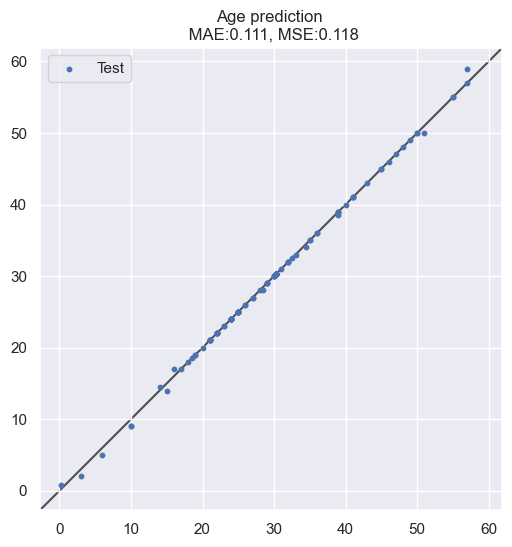

In [35]:
ys_mae = mean_absolute_error(y_test,y_pred)
ys_mse = mean_squared_error(y_test,y_pred)

fig, ax = plt.subplots(1,1,figsize=(14,6))

ax.scatter(y_test,y_pred, s=10, label='Test')

ax.set_title(f'Age prediction \n MAE:{ys_mae:.3f}, MSE:{ys_mse:.3f}')

ax.legend()

# Adding an x=y line.
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

# The end

Using random forest regressor for the age prediction

In [36]:
from sklearn.ensemble import RandomForestRegressor

In [37]:
RFR = RandomForestRegressor(n_estimators=1,max_depth=4, random_state=42)

RFR.fit(X_train,y_train)

y_pred = RFR.predict(X_test)

(-2.6715, 61.594750000000005)

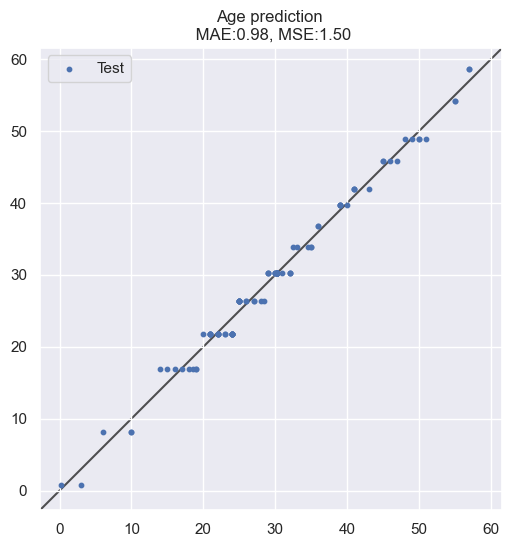

In [38]:
ys_mae = mean_absolute_error(y_test,y_pred)
ys_mse = mean_squared_error(y_test,y_pred)

fig, ax = plt.subplots(1,1,figsize=(14,6))

ax.scatter(y_test,y_pred, s=10, label='Test')

ax.set_title(f'Age prediction \n MAE:{ys_mae:.2f}, MSE:{ys_mse:.2f}')

ax.legend()

# Adding an x=y line.
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

initially when the dept was 1, the MAE was equals to 5.64 and since the closer the MAE is to zero, the better the prediction so we try increasing the dept to get as close to zero as possible.
- tried even numbers with the increment of two and figure the best MAE gotten was 0.98 at the dept of 4 and afterwards the MAE stopped increasing Irregardless of the dept increment